## Some experiments on data

In [1]:
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler # normalization

In [2]:
def compute(image_name):
    #reading image
    img = cv2.imread(image_name)  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #keypoints
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img,None)
    img_1 = cv2.drawKeypoints(gray,keypoints,img)
    return img_1, keypoints, descriptors

#plt.imshow(img_1)

## DATA PROCESSING

In [3]:
cont=0

print("stampo i file all'interno della mia directory:\n")

for file in os.listdir("./image"):
    if(file!=".ipynb_checkpoints"):
        print(file)
        cont+=1

print("\nil numero delle immagini presenti è:",cont)

stampo i file all'interno della mia directory:

8_11_s.bmp
7_7_s.bmp
6_1_s.bmp
1_9_s.bmp

il numero delle immagini presenti è: 4


In [4]:
data = []
label = []
data_label = []
image_set = []
descriptors_set = []
path = "image_selected/"
c = 0
d = 0

for file in os.listdir(path):
    if(file!=".ipynb_checkpoints"):
        source=path+file
        img=cv2.imread(source)

        if file[:1]=='1':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("mucche")
            for j in range(0,len(de)):
                data_label.append(0)

        if file[:1]=='6':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("faccia")
            for j in range(0,len(de)):
                data_label.append(1)

        if file[:1]=='7':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("macchina")
            for j in range(0,len(de)):
                data_label.append(2)

        if file[:1]=='8':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("bicicletta")
            for j in range(0,len(de)):
                data_label.append(3)

        data.append(img)
data = np.array(data)

[ WARN:0] global /Users/runner/miniforge3/conda-bld/libopencv_1612623444100/work/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736
/var/folders/q3/n1kzrjss3rlcf4h0671f29640000gn/T/ipykernel_11129/2341137512.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [5]:
print(len(image_set))
print(len(descriptors_set))
print(len(data))
print(len(label))
print(len(data_label))

120
120
120
120
57432


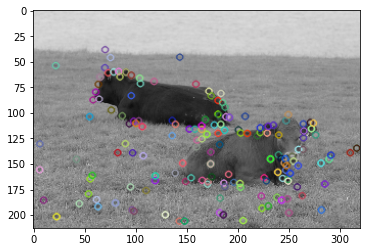

In [6]:
plt.imshow(image_set[0])

## PREPROCESSING

In [7]:
desc=np.vstack(descriptors_set)

In [8]:
np.shape(desc)

(57432, 128)

## K-Means

In [9]:
data=desc

In [10]:
scaler = MinMaxScaler()
data = scaler.fit_transform(desc)

In [11]:
np.shape(data)

(57432, 128)

In [12]:
kmeans = KMeans(100)
kmeans.fit(data)

KMeans(n_clusters=100)

In [13]:
clusters = kmeans.fit_predict(data)
clusters.shape

(57432,)

In [14]:
clusters[2089]

80

In [15]:
print(np.shape(clusters))

(57432,)


## Mapping labels

In [16]:
print(len(clusters))
print(len(data_label))

57432
57432


conto quanti cluster ho anche se lo so già

In [17]:
np.unique(clusters)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32)

metto a 1 le posizioni degli elementi che contengono quel particolare cluster ad esempio metto la posizione a 1
    np.where(clusters == 22,1,0) mi restituisce un array 2090  

In [18]:
index = np.where(clusters == 22,1,0)
len(index)

57432

[0 1 0 1 0 0 0 0 0 ] -> array dove 1 segna i descrittori che sono associati al cluster 22 nel mio caso
    da qui 

In [19]:
index

array([0, 0, 0, ..., 0, 0, 0])

mi conto quanti elementi ho

In [20]:
np.bincount(index)

array([56957,   475])

in questo caso nel cluster 22 ho 36 elementi(descrittori) all'interno, mi salvo l'indice di ciascuno di questi descrittori

In [21]:
indices = [index1 for index1, element in enumerate(index) if element == 1]
len(indices)

475

per ogni descrittore prendo il label che gli avevo associato e lo salvo in un array

In [ ]:
somma=[]

for l in indices:    
    print("indice riga del descrittore: ", l ,"----> labels associato:" , data_label[l])
    somma.append(data_label[l])

conto il label che compare maggiormente all'interno

In [23]:
np.bincount(somma).argmax()

3

mi salvo adesso in un dizionario l'indice del cluster associato, nel nostro esempio era 22, il label che è più presente all'interno


In [24]:
reference_label = {} 
num=np.bincount(somma).argmax()
reference_label[0] = num
reference_label

{0: 3}

adesso inizializzo un array avente come dimensione il numero di descrittori presenti 

In [25]:
len(clusters)

57432

In [26]:
temp_labels = np.random.rand(len(clusters))
temp_labels

array([0.32396017, 0.24071526, 0.10970525, ..., 0.8387782 , 0.89679529,
       0.06080689])

mi prendo il cluster che è associato al primo descrittore 

In [27]:
clusters[0]

17

ed utilizzo questo indice per trovarmi nel dizionario il cluster di riferimento

In [28]:
temp=0 #clusters[0]
for i in range(len(clusters)):
        temp_labels[0] = reference_label[temp]
print(temp_labels[0])

3.0


in questo caso ho preso il riferimento del label associato al cluster 0 e l'ho salvato in temp.

Quello che ottengo sono due array:

    -   temp_labels (in cui ad ogni descrittore ho il label associato dal kmeans)
    -   data_labels (in cui ho i label effettivi di ogni descrittore)
   
a questo punto vado a confrontare il label che è stato associato dal kmeans (label che compariva maggiormente nel cluster) con quello che il realtà è il label del cluster effettivo 

## FUNCTION

funzione che presi in input il numero di clusters, mi crea un dizionario dove per ogni indice del cluster mi segna il label dell'elemento che compare maggiormente al suo interno

In [29]:
reference_label = {}

def get_reference_dict(clusters,data_label):
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        indices = [index1 for index1, element in enumerate(index) if element == 1]
        somma = []
        for l in indices:
            somma.append(data_label[l])
        num=np.bincount(somma).argmax()
        reference_label[i] = num

    return reference_label

In [30]:
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [31]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
from sklearn.metrics import confusion_matrix

print("accuratezza nella classificazione:", accuracy_score(predicted_labels,data_label))

#matrice 4x4 in cui avremo per ogni riga un label (predetti e reali)
print("\n",confusion_matrix(predicted_labels, data_label))

accuratezza nella classificazione: 0.4238751915308539

 [[  453   236   290   396]
 [  313   436   380   404]
 [ 1580  2119  3080  2266]
 [ 7602  7445 10057 20375]]


## ELBOWMETHOD

In [ ]:
sse = []
list_k = [2,16,64,100,256,512,1024,2048,4096]
for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(data)
    #salvo la distanza dei punti dal cluster
    sse.append(km.inertia_)
    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)
    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Accuracy for k = 2:  0.4081522496169383
Accuracy for k = 16:  0.4240318985931188
Accuracy for k = 64:  0.42317871569856524
Accuracy for k = 100:  0.42599944281933416
Accuracy for k = 256:  0.43627246134559133
Accuracy for k = 512:  0.44184426800390025
Accuracy for k = 1024:  0.4522217579050007


In [ ]:
#matrice 4x4 in cui avremo per ogni riga un label (predetti e reali)
print("\n",confusion_matrix(predicted_labels, data_label))

In [ ]:
import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(predicted_labels, data_label, labels=[0, 1, 2, 3]), 
    index=['mucche', 'faccia','macchina','bicicletta'], 
    columns=['mucche', 'faccia','macchina','bicicletta']
)
print(cmtx)